<a href="https://colab.research.google.com/github/nataliiakrasilynets/Sales-Analytics/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Changing work folder
%cd /content/drive/MyDrive/PythonforDataAnalytics/

/content/drive/MyDrive/PythonforDataAnalytics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
events = pd.read_csv("events.csv")
countries = pd.read_csv("countries.csv")
products = pd.read_csv("products.csv")

# Data overview
1. countries - це дані про країни, а саме країна (назва, код з двох літер та трьох літер), регіон(назва та код).
2. events - замовлення id та дата, відправка, країни (код з трьох літер), id продукту, канал, продана к-сть, ціна за 1 шт. та витрати
3. products - дані про продукт (код та назва)
### countries та events поєднані за кодом країни, events та products за id продукта

# Data cleaning

In [ ]:
#Таблиця events
events.isna().sum() / events.shape[0]
events["Units Sold"] = events["Units Sold"].fillna(events["Units Sold"].mean())
events_n = events.dropna(subset=["Country Code"])
events_n["Order Date"] = pd.to_datetime(events_n["Order Date"], format="%m/%d/%Y")
events_n["Ship Date"] = pd.to_datetime(events_n["Ship Date"], format="%m/%d/%Y")
"""
Для перевірки дублікатів в кожному стовпці формату object
events_n ["Sales Channel"] = events_n["Sales Channel"].str.upper()
events_n ["Sales Channel"] = events_n["Sales Channel"].str.srtip()
Для перевірки дублікатів в кожному стовпці
even = events_n[events_n.duplicated() == True].count()
"""
data = (events_n["Ship Date"] - events_n["Order Date"]).dt.days
dat = data[data < 0]
#Для стовпців Unit Cost, Unit Price, Unit Sold
anom = events_n[events_n["Unit Cost"] < 0]

<ipython-input-5-9b5fe40ca256>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_n["Order Date"] = pd.to_datetime(events_n["Order Date"], format="%m/%d/%Y")
<ipython-input-5-9b5fe40ca256>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_n["Ship Date"] = pd.to_datetime(events_n["Ship Date"], format="%m/%d/%Y")


In [ ]:
#Таблиця countries
countries.isna().sum() / countries.shape[0]
countries["region"] = countries["region"].fillna("Antarctica")
countries["sub-region"] = countries["sub-region"].fillna("Antarctica")
countries["alpha-2"] = countries["alpha-2"].fillna("NA")

### 1. В таблиці
1. products немає пропущених даних
2. countries є пропущені дані, скоріш за все були помилково введені або даних про країну немає, але про регіон
3. events також є пропущені дані

### 2.
в таблиці
1. events я видалила рядки, які мають пропущені значення в колонці з кодом країни (так як при аналізу те чи інше значення може значно повпливати на статистику, наприклад, в розрізі країн), а рядку продана к-сть заповнила середнім.
2. countries я заповнила пропущені значення відповними, тому що стовпець який з'єднується з табл events не мав пропущених значень
###3.
У всіх таблицях типи даних розпізнаються коректно, крім events (Ship Date, Order Date)
###4
events,products,countries не містить дублікатів
###5
Аномалій немає

# Data analysis and visualization

## Зміна назв стовпців, join та видалення непотрібних стовпців

In [ ]:
countries["Country Code"] = countries["alpha-3"]
countries_n = countries.drop("alpha-3", axis=1)
products.rename(columns={"id": "Product ID"}, inplace=True)

In [ ]:
inner_join = pd.merge(events_n, countries_n, on="Country Code", how="inner")
inner_j = pd.merge(inner_join, products, on="Product ID", how="inner")
df = inner_j.drop(["alpha-2", "Product ID", "Country Code"], axis=1)
df.rename(columns={"name": "Country"}, inplace=True)
df.rename(columns={"item_type": "Category"}, inplace=True)
df['Sales Channel'] = df['Sales Channel'].str.lower()

## Загальні розрахунки

In [ ]:
profit = (df["Unit Price"] - df["Unit Cost"])*df["Units Sold"]
total_order = df["Order ID"].count()
total_sold = df["Units Sold"].sum()
total_profit = profit.sum()
total_cost = df["Unit Cost"].sum()
total_countries = df["Country"].nunique()
total_categories = df["Category"].nunique()
total_region = df["region"].nunique()
total_sub_region = df["sub-region"].nunique()
min_date = df["Order Date"].min()
max_date = df["Order Date"].max()
mins_date = df["Ship Date"].min()
maxs_date = df["Ship Date"].max()
print(f"Загальна кількість замовлень: {total_order}")
print(f"Загальна кількість проданих товарів: {total_sold}")
print(f"Загальна чистий прибуток: {total_profit}")
print(f"Загальна витрати на товари: {total_cost}")
print(f"Загальна кількість країн: {total_countries}")
print(f"Загальна кількість категорій: {total_categories}")
print(f"Загальна кількість регіонів: {total_region}")
print(f"Загальна кількість під-регіонів: {total_sub_region}")
print(f"Перша дата замовлення: {min_date}")
print(f"Остання дата замовлення: {max_date}")
print(f"Перша дата відправки: {mins_date}")
print(f"Остання дата відправки: {maxs_date}")

Загальна кількість замовлень: 1248
Загальна кількість проданих товарів: 6181575.403614458
Загальна чистий прибуток: 474116403.18066263
Загальна витрати на товари: 232563.73
Загальна кількість країн: 45
Загальна кількість категорій: 12
Загальна кількість регіонів: 2
Загальна кількість під-регіонів: 5
Перша дата замовлення: 2010-01-01 00:00:00
Остання дата замовлення: 2017-07-22 00:00:00
Перша дата відправки: 2010-01-10 00:00:00
Остання дата відправки: 2017-08-31 00:00:00


In [ ]:
revenue = df["Units Sold"] * df["Unit Price"]
cost = df["Units Sold"] * df["Unit Cost"]
df["Revenue"] = revenue
df["Cost"] = cost
df["Profit"] = profit

## Доходи, витрати, прибутки та популярність

In [ ]:
#Доходи в розрізі
rev_cat = df.groupby("Category")["Revenue"].sum().reset_index(name="Revenue_category")
rev_countr = df.groupby("Country")["Revenue"].sum().reset_index(name="Revenue_country")
rev_reg = df.groupby("region")["Revenue"].sum().reset_index(name="Revenue_region")
rev_sub_reg = df.groupby("sub-region")["Revenue"].sum().reset_index(name="Revenue_sub_region")
rev_chan = df.groupby("Sales Channel")["Revenue"].sum().reset_index(name="Revenue_channel")

In [ ]:
#Витрати в розрізі
cost_cat = df.groupby("Category")["Cost"].sum().reset_index(name="Cost_category")
cost_countr = df.groupby("Country")["Cost"].sum().reset_index(name="Cost_country")
cost_reg = df.groupby("region")["Cost"].sum().reset_index(name="Cost_region")
cost_sub_reg = df.groupby("sub-region")["Cost"].sum().reset_index(name="Cost_sub_region")
cost_chan = df.groupby("Sales Channel")["Cost"].sum().reset_index(name="Cost_channel")

In [ ]:
#Прибутки в розрізі
prof_cat = df.groupby("Category")["Profit"].sum().reset_index(name="Profit_category")
prof_countr = df.groupby("Country")["Profit"].sum().reset_index(name="Profit_country")
prof_reg = df.groupby("region")["Profit"].sum().reset_index(name="Profit_region")
prof_sub_reg = df.groupby("sub-region")["Profit"].sum().reset_index(name="Profit_sub_region")
prof_chan = df.groupby("Sales Channel")["Profit"].sum().reset_index(name="Profit_channel")

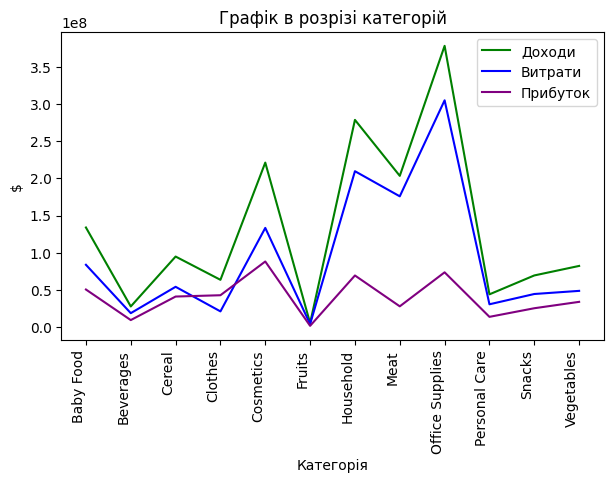

In [ ]:
## Графік в розрізі категорій
plt.figure(figsize=(7, 4))
# Доходи
sns.lineplot(x="Category", y="Revenue_category", data=rev_cat, color="green", label="Доходи")
# Витрати
sns.lineplot(x="Category", y="Cost_category", data=cost_cat, color="blue", label="Витрати")
# Прибуток
sns.lineplot(x="Category", y="Profit_category", data=prof_cat, color="purple", label="Прибуток")

plt.title("Графік в розрізі категорій")
plt.xlabel("Категорія")
plt.ylabel("$")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

Можемо спостерігати в розрізі категорій, що найвищі доходи в категорії office supplies, але при цьому є деякі категорії де витрати менші ніж прибутки(а саме категорії одяг та косметика)

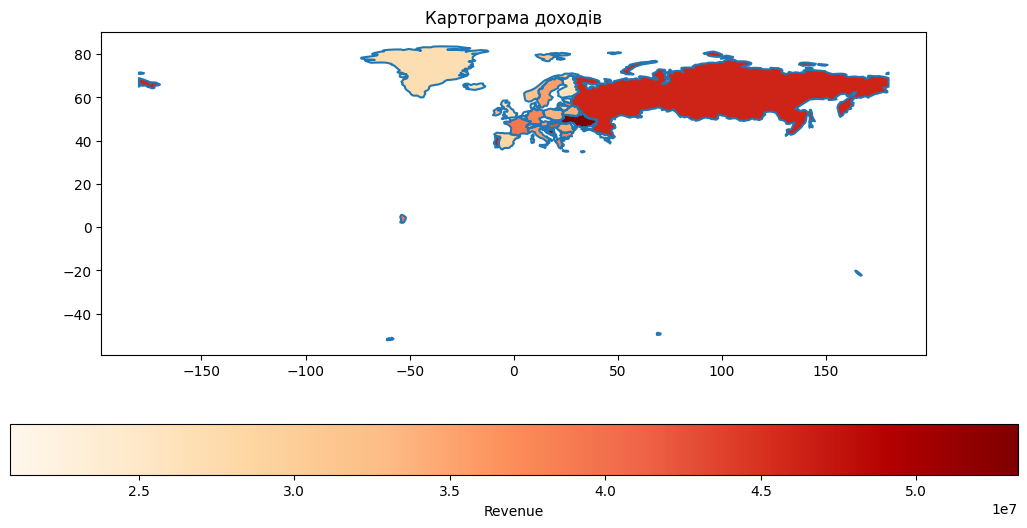

In [ ]:
# Графік в розрізі країн
#Доходи
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
gdf = gpd.read_file(url)
gdf = gdf.merge(rev_countr, left_on='SOVEREIGNT', right_on='Country')
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
gdf.boundary.plot(ax=ax)
gdf.plot(column='Revenue_country', ax=ax, legend=True, legend_kwds={'label': "Revenue", 'orientation': "horizontal"}, cmap='OrRd')
plt.title('Картограма доходів')
plt.show()

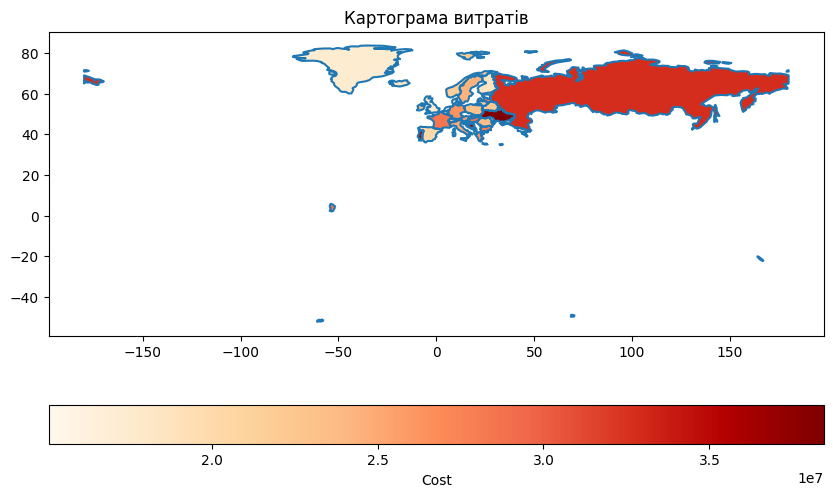

In [ ]:
#Витрати
gdf1 = gdf.merge(cost_countr, left_on='SOVEREIGNT', right_on='Country')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf1.boundary.plot(ax=ax)
gdf1.plot(column='Cost_country', ax=ax, legend=True, legend_kwds={'label': "Cost", 'orientation': "horizontal"}, cmap='OrRd')
plt.title('Картограма витратів')
plt.show()

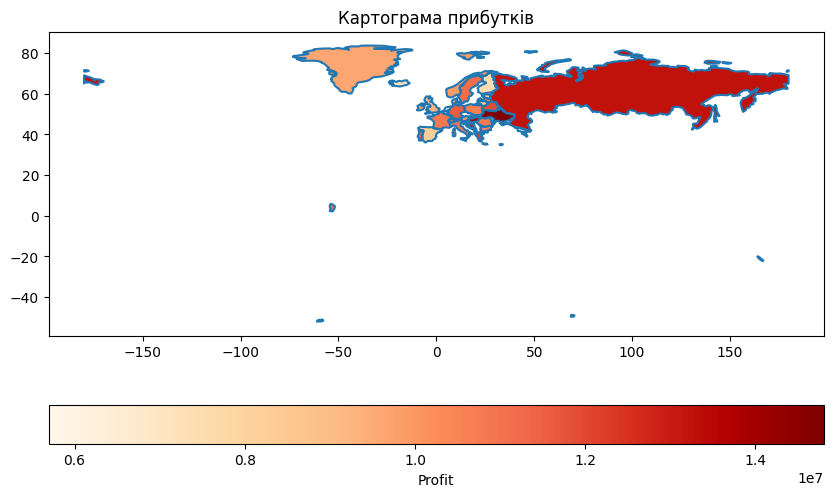

In [ ]:
#Витрати
gdf2 = gdf.merge(prof_countr, left_on='SOVEREIGNT', right_on='Country')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf2.boundary.plot(ax=ax)
gdf2.plot(column='Profit_country', ax=ax, legend=True, legend_kwds={'label': "Profit", 'orientation': "horizontal"}, cmap='OrRd')
plt.title('Картограма прибутків')
plt.show()

Стосовно прибутків в розрізі країн, можемо бачити що найбільші доходи та витрати Україна, Португалія, росія, а найменші Велика Британія та Іспанія, при цьому прибуток Україна, росія, тоді як у Великій Британії та Іспанії не найменші доходи

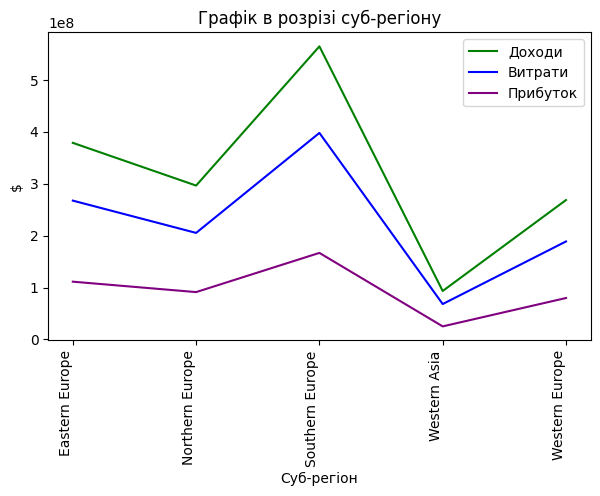

In [ ]:
# Графік в розрізі суб-регіону

plt.figure(figsize=(7, 4))
# Доходи
sns.lineplot(x="sub-region", y="Revenue_sub_region", data=rev_sub_reg, color="green", label="Доходи")
# Витрати
sns.lineplot(x="sub-region", y="Cost_sub_region", data=cost_sub_reg, color="blue", label="Витрати")
# Прибуток
sns.lineplot(x="sub-region", y="Profit_sub_region", data=prof_sub_reg, color="purple", label="Прибуток")
plt.title("Графік в розрізі суб-регіону")
plt.xlabel("Суб-регіон")
plt.ylabel("$")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

Стосовно суб-регіонів найвищі доходи в Південній Європі

In [ ]:
asia_rev = rev_reg[rev_reg["region"] == "Asia"].reset_index(drop=True)
asia_cost = cost_reg[cost_reg["region"] == "Asia"].reset_index(drop=True)
asia_prof = prof_reg[prof_reg["region"] == "Asia"].reset_index(drop=True)
asia = { "Aggregation": ["revenue", "cost", "profit"],
        "values": [ asia_rev["Revenue_region"].sum(), asia_cost["Cost_region"].sum(), asia_prof["Profit_region"].sum() ] }
asia = pd.DataFrame(asia)
eu_rev = rev_reg[rev_reg["region"] == "Europe"].reset_index(drop=True)
eu_cost = cost_reg[cost_reg["region"] == "Europe"].reset_index(drop=True)
eu_prof = prof_reg[prof_reg["region"] == "Europe"].reset_index(drop=True)
eu = { "Aggregation": ["revenue", "cost", "profit"],
        "values": [ eu_rev["Revenue_region"].sum(), eu_cost["Cost_region"].sum(), eu_prof["Profit_region"].sum() ] }
eu = pd.DataFrame(eu)

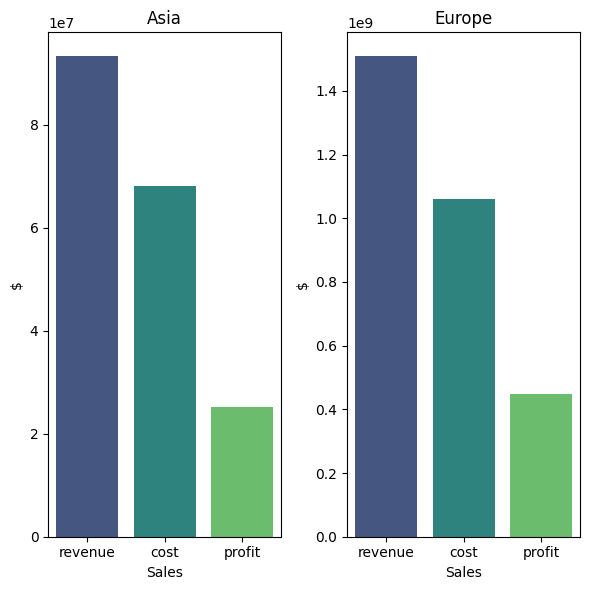

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 6))

# Графік в розрізі регіону (Asia)
sns.barplot(x='Aggregation', y='values', data=asia, hue="Aggregation", palette="viridis", ax=ax[0])
ax[0].set_title("Asia")
ax[0].set_xlabel("Sales")
ax[0].set_ylabel("$")
# Графік в розрізі регіону (Europe)
sns.barplot(x='Aggregation', y='values', data=eu, hue='Aggregation', palette="viridis", ax=ax[1])
ax[1].set_title("Europe")
ax[1].set_xlabel("Sales")
ax[1].set_ylabel("$")

plt.tight_layout()
plt.show()

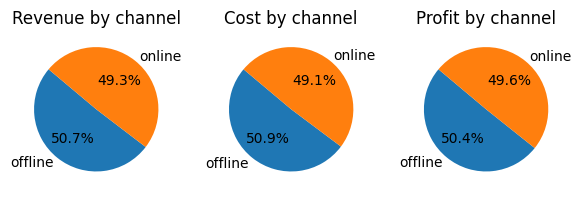

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(6, 6))

# Графік в розрізі каналу
##Доходи
ax[0].pie(rev_chan['Revenue_channel'], labels=rev_chan['Sales Channel'], autopct='%1.1f%%', startangle=140)
ax[0].set_title("Revenue by channel")

##Витрати
ax[1].pie(cost_chan['Cost_channel'], labels=cost_chan['Sales Channel'], autopct='%1.1f%%', startangle=140)
ax[1].set_title("Cost by channel")

##Прибуток
ax[2].pie(prof_chan['Profit_channel'], labels=prof_chan['Sales Channel'], autopct='%1.1f%%', startangle=140)
ax[2].set_title("Profit by channel")

plt.tight_layout()
plt.show()

Зараз у світі технолоій та доступності люди, все ж таки, надають перевагу купівель офлайн.

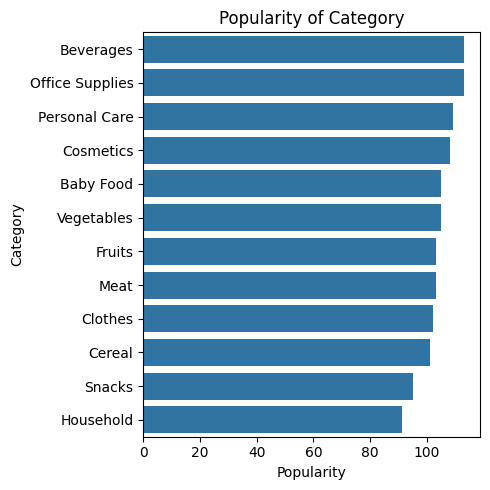

In [ ]:
# Графік з витратами в розрізі категорій
pop_cat = df.groupby("Category")["Category"].count().reset_index(name='Count Category').sort_values(by='Count Category', ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(y="Category", x="Count Category", data=pop_cat, orient='h')
plt.title("Popularity of Category")
plt.xlabel("Popularity")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

В топі-10 займають перші місця категорії Beverages, Office Suplies та Personal Care.

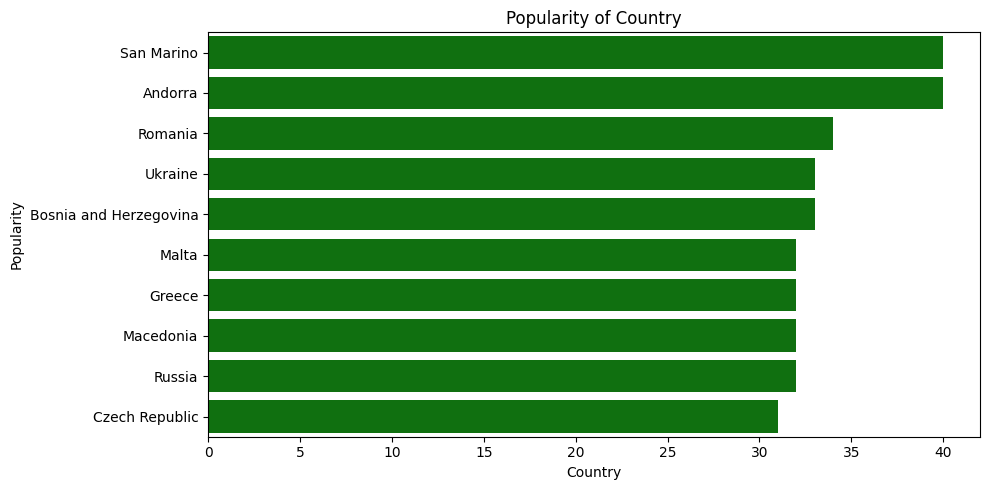

In [ ]:
# Графік популярності в розрізі країн
pop_countr = df.groupby("Country")["Country"].count().reset_index(name="count_country").sort_values(by="count_country", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y="Country", x="count_country", data=pop_countr, color = "green", orient='h')
plt.title("Popularity of Country")
plt.xlabel("Country")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

В розрізі країн бачимо, що найбільш біло продажей в San Marino, Andorra та Україна.

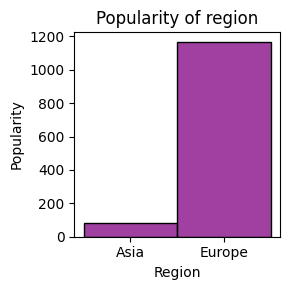

In [ ]:
# Графік популярності в розрізі регіонів
pop_countr = df.groupby("region")["region"].count().reset_index(name="Region")
plt.figure(figsize=(3, 3))
sns.histplot(x="region", weights="Region", data=pop_countr, color = "purple")
plt.title("Popularity of region")
plt.xlabel("Region")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

За к-стю проданих товарів бачимо найвищий показник в Європі, а якщо розглянемо наступний графік то побачимо що саме в Південній Європі (якщо згадаємо графік з найвищими прибутками то саме в Південній Європі)

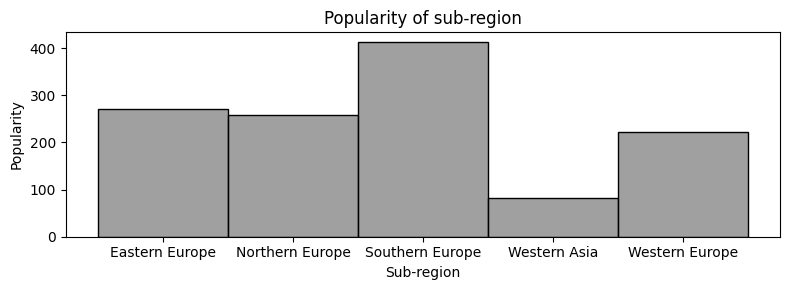

In [ ]:
# Графік популярності в розрізі суб-регіонів
pop_countr = df.groupby("sub-region")["sub-region"].count().reset_index(name="Sub-region")
plt.figure(figsize=(8, 3))
sns.histplot(x="sub-region", weights="Sub-region", data=pop_countr, color = "gray")
plt.title("Popularity of sub-region")
plt.xlabel("Sub-region")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

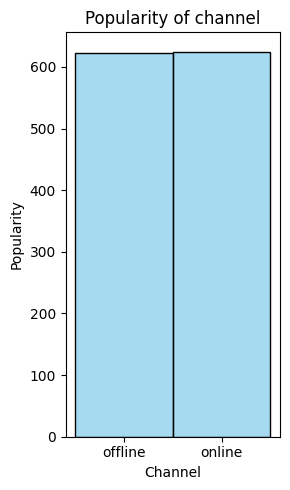

In [ ]:
# Графік популярності в розрізі каналів
pop_countr = df.groupby("Sales Channel")["Sales Channel"].count().reset_index(name="Channel")
plt.figure(figsize=(3, 5))
sns.histplot(x="Sales Channel", weights="Channel", data=pop_countr, color = "skyblue")
plt.title("Popularity of channel")
plt.xlabel("Channel")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

При тому що найвищі показники з доходами ми отримали офлайн, але найвищий показник к-сті проданих товарів саме онлайн

## Інтервал часу між замовленням та його відвантаженням

In [ ]:
days = (df["Ship Date"] - df["Order Date"]).dt.days
df["days"] = days
day_cat = df.groupby("Category")["days"].mean().reset_index(name="mean_days_cat")
day_countr = df.groupby("Country")["days"].mean().reset_index(name="mean_days_count")
day_reg = df.groupby("region")["days"].mean().reset_index(name="mean_days_reg")

<ipython-input-25-8e9505d57804>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


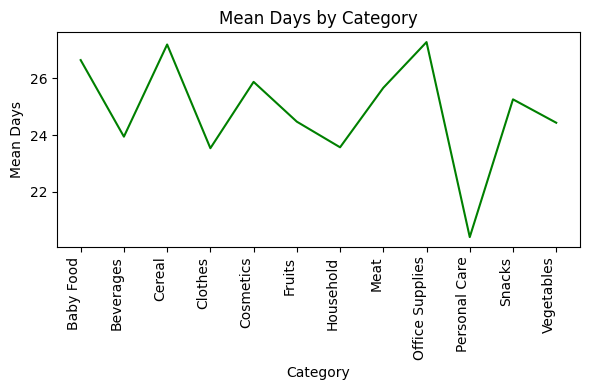

In [ ]:
# Дні за категоріями
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x="Category", y="mean_days_cat", data=day_cat, color= "green")
ax.set_title("Mean Days by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Mean Days")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-26-94317b78b40e>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


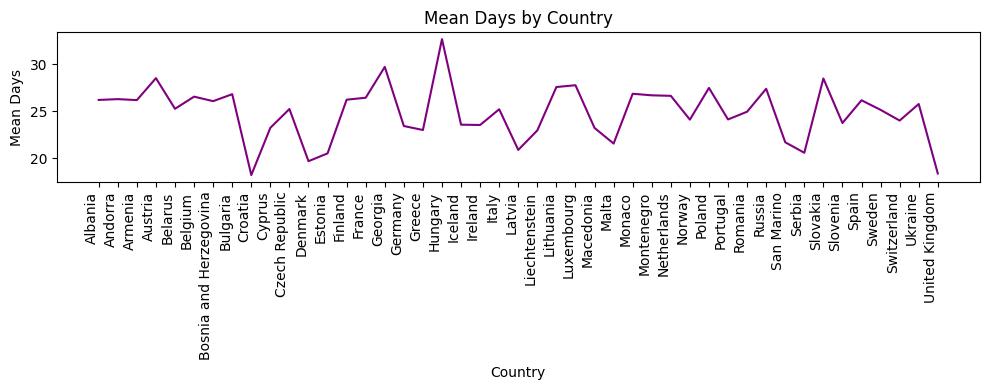

In [ ]:
# Дні за країнами
plt.figure(figsize=(10, 4))
ax = sns.lineplot(x="Country", y="mean_days_count", data=day_countr, color= "purple")
ax.set_title("Mean Days by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Mean Days")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()
plt.show()

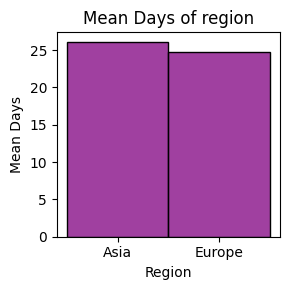

In [ ]:
plt.figure(figsize=(3, 3))
sns.histplot(x="region", weights="mean_days_reg", data=day_reg, color = "purple")
plt.title("Mean Days of region")
plt.xlabel("Region")
plt.ylabel("Mean Days")
plt.tight_layout()
plt.show()

Дні,які компанія витрачає на відвантаження товару найменший показник це в Європі, але якщо в розрізі країн то це Хорватія і Велика Британія, при чому якщо розглядати в розрізі категорій це товари з категорії Особиста гігієна

## Залежність прибутку від часу, необхідного на відвантаження товару

In [ ]:
aggregated_data = df.groupby('days')['Revenue'].agg(['sum', 'mean']).reset_index()
aggregated_data.columns = ['Delivery Time', 'Total Revenue', 'Average Revenue']

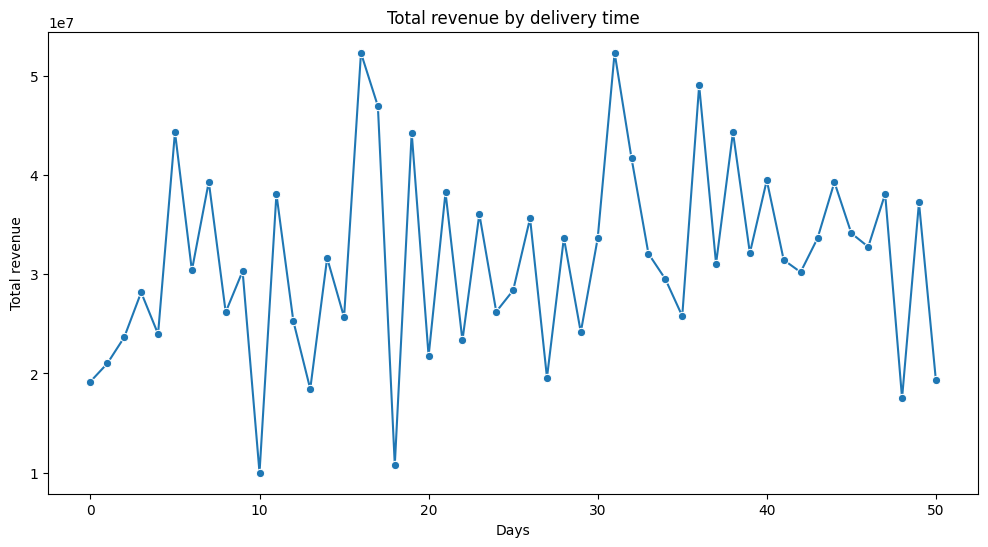

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Delivery Time', y='Total Revenue', data=aggregated_data, marker='o')
plt.title('Total revenue by delivery time')
plt.xlabel('Days')
plt.ylabel('Total revenue')
plt.show()

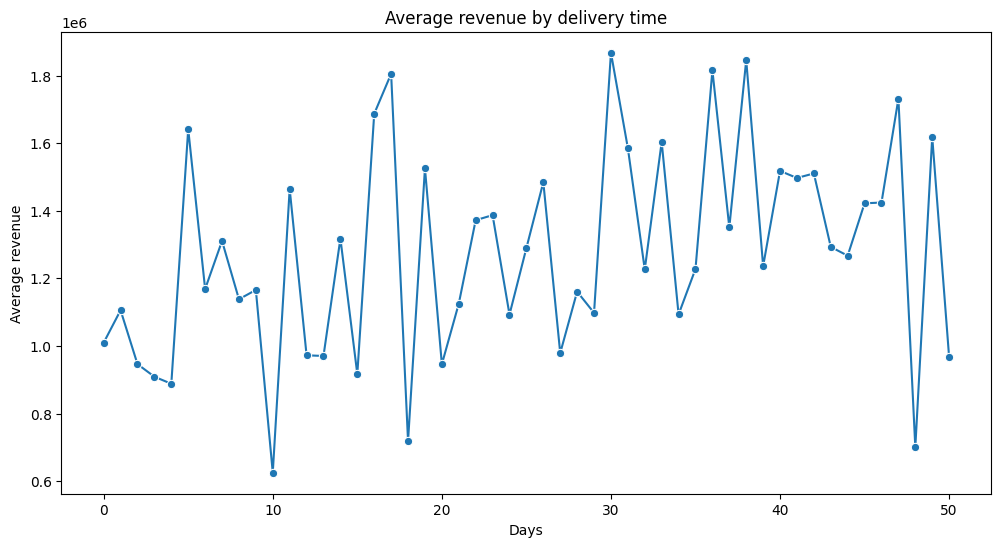

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Delivery Time', y='Average Revenue', data=aggregated_data, marker='o')
plt.title('Average revenue by delivery time')
plt.xlabel('Days')
plt.ylabel('Average revenue')
plt.show()

Якщо розглядати динаміку залежності прибутку від часу, то досить хаотичний

## Динаміка продажів (у часі) у розрізі

In [ ]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

In [ ]:
monthly_sales = df.groupby(['year', 'month', 'Category', 'Country', 'region'])['Revenue'].sum().reset_index()

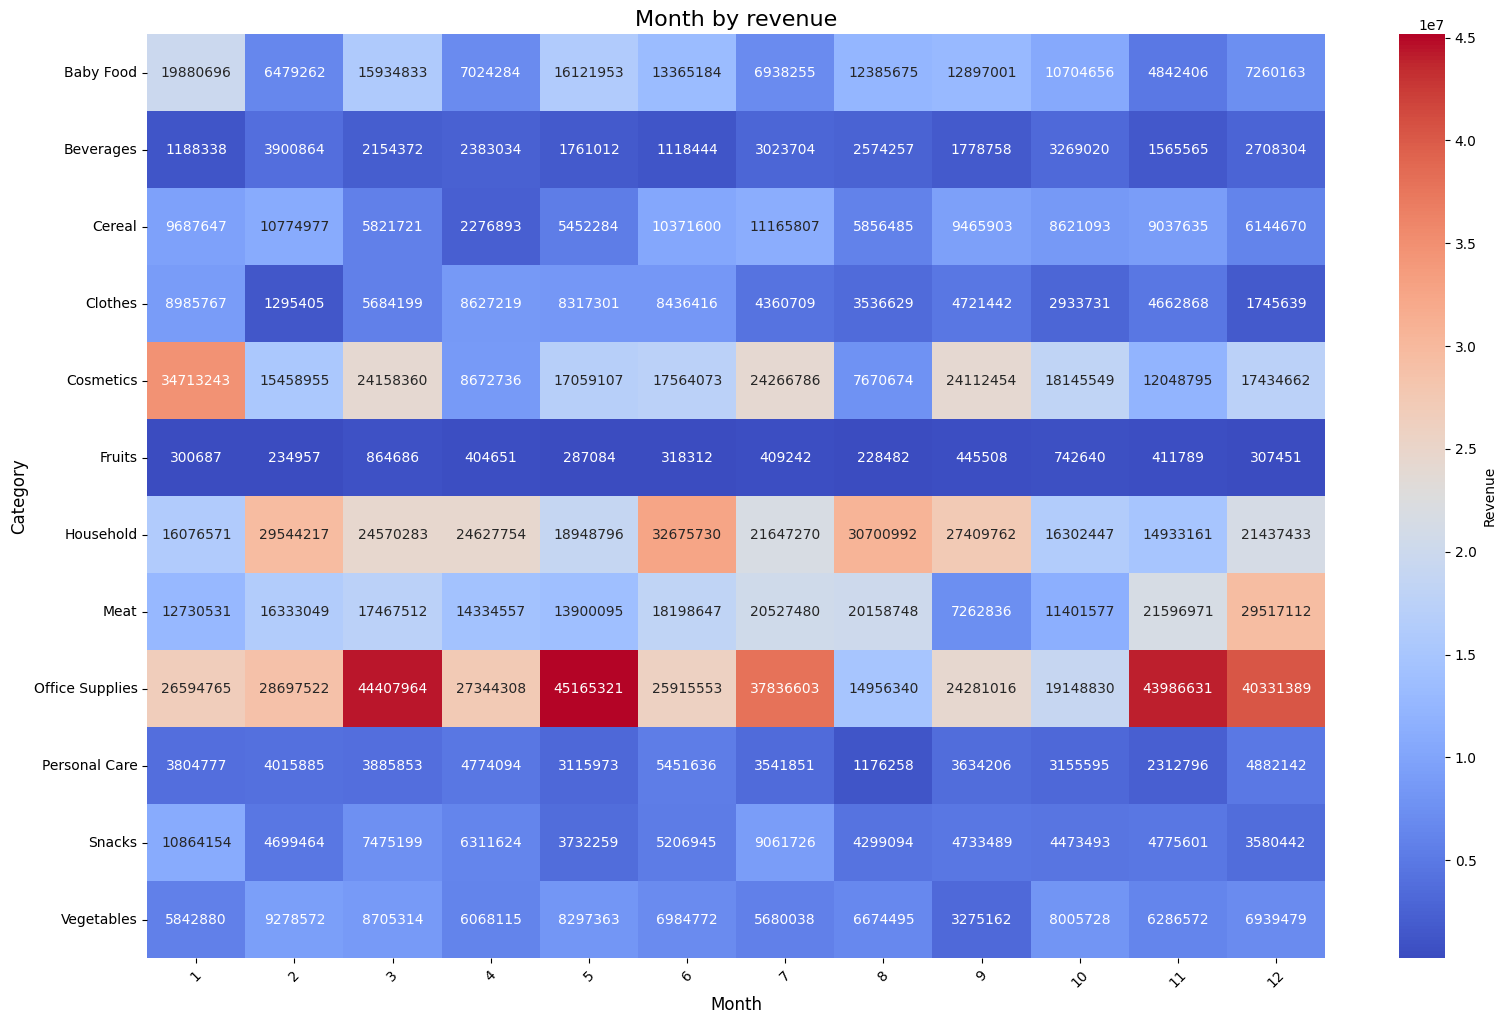

In [ ]:
pivot_table1 = monthly_sales.pivot_table(index='Category', columns='month', values='Revenue', aggfunc='sum')
plt.figure(figsize=(19, 12))
sns.heatmap(pivot_table1, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Revenue'})
plt.title('Month by revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Динаміка продажів (у часі) в розрізі категорій:
- в деяких категоріях можемо побачити сезонність, а саме Косметика, товари для офісу та товари для будинку
- в більшості категоріях стабільність протягом всього року, в таких як Фрукти, напої та товари для особистої гігієни

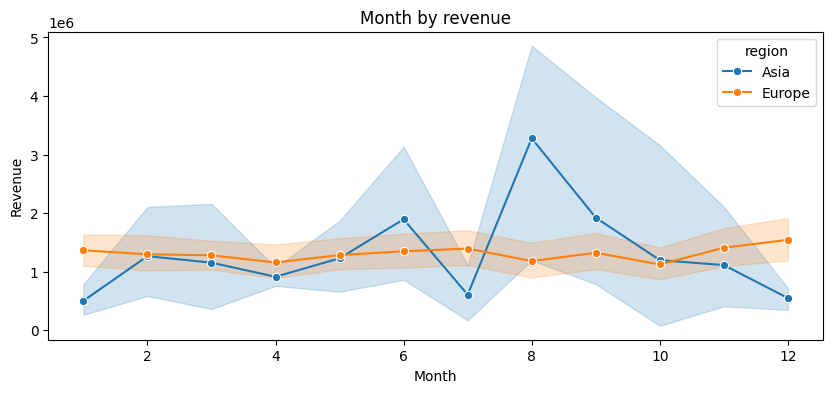

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_sales, x='month', y='Revenue', hue='region', marker='o')
plt.title('Month by revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

В розрізі регіонів, а саме в Європі немає немає хаотичності, більш монотонні доходи на відміну від Азії, де можна побачити сезонність в 2-ому, 6-ому та 8-ому місяці

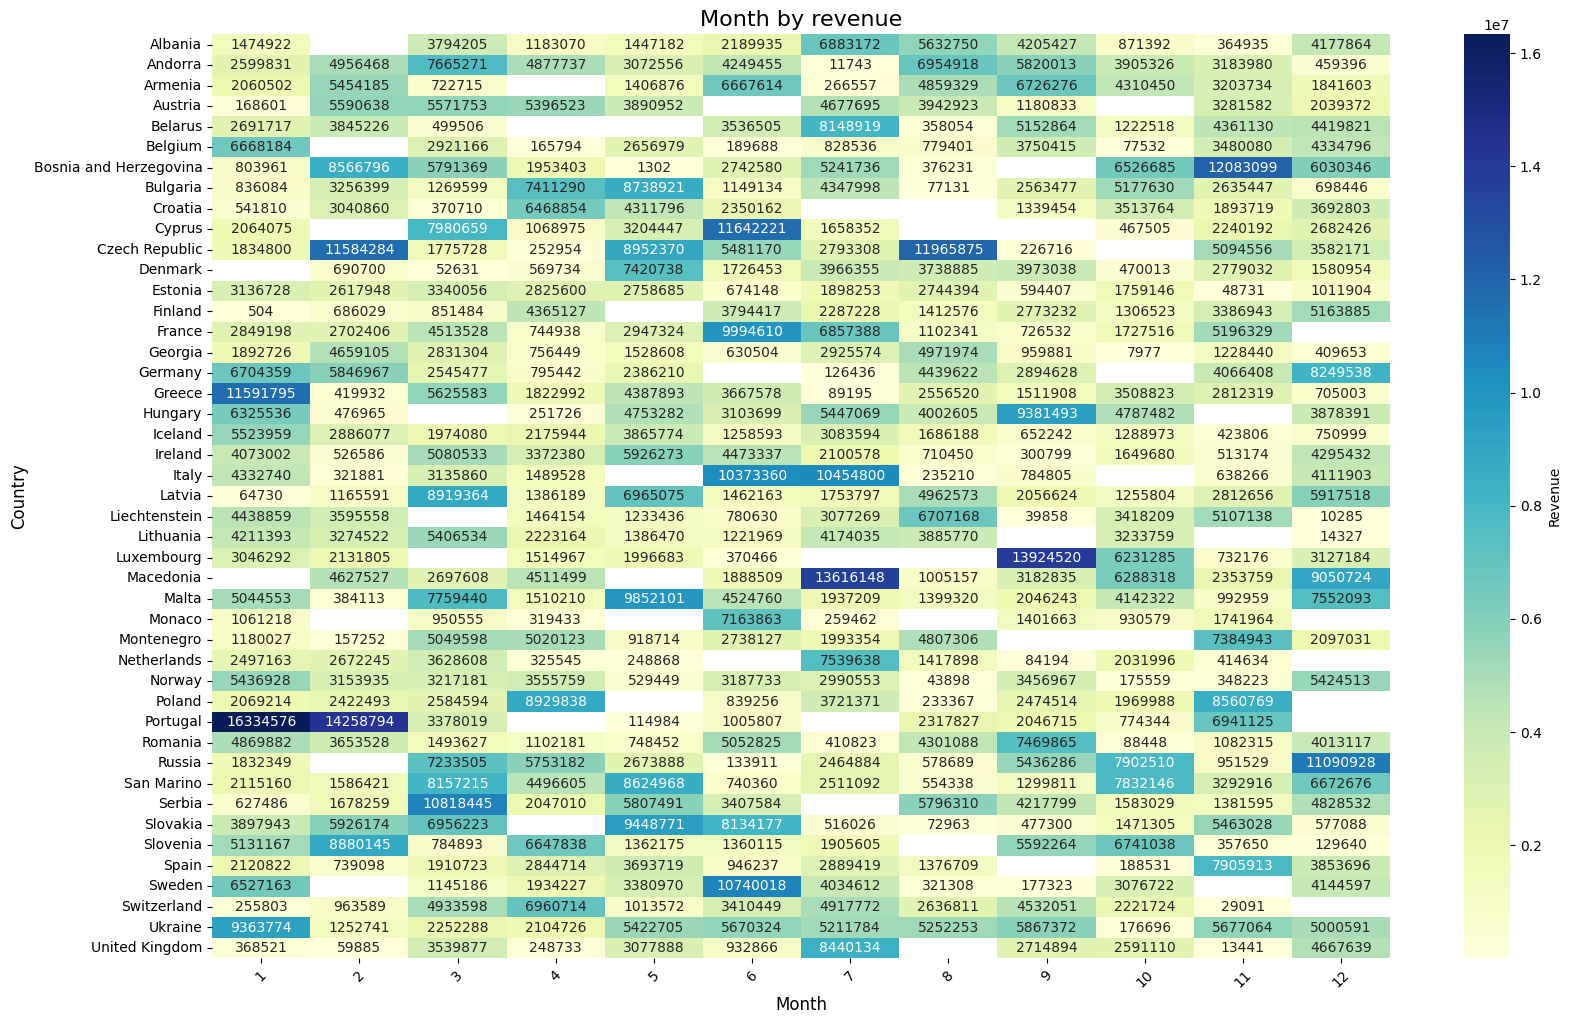

In [ ]:
pivot_table = monthly_sales.pivot_table(index='Country', columns='month', values='Revenue', aggfunc='sum')
plt.figure(figsize=(19, 12))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Revenue'})
plt.title('Month by revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Найвищі доходи можемо побачити в:
- Португалії (1-й та 2-й місяць)
- Македонії (7-й)
- Люксембург (9-й)

При чому в цих країнах по-інших місяцях будуть будут низькі доходу, а "особливих" місяцях взагалі може не бути продажей

## Продажі товарів за днями тижня

In [ ]:
week_day = df["Order Date"].dt.day_name()
df["week_day"] = week_day
w_d_reve = df.groupby("week_day")["Revenue"].sum().reset_index(name="Revenue")

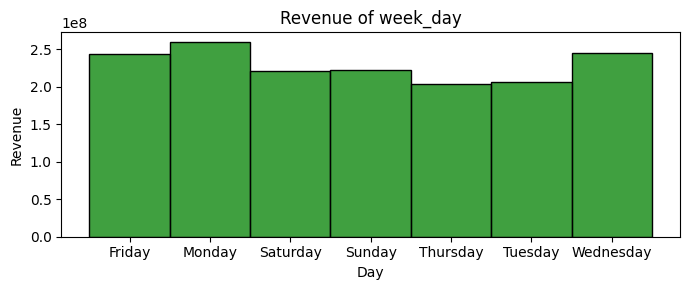

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(x="week_day", weights="Revenue", data=w_d_reve, color = "green")
plt.title("Revenue of week_day")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

Як бачимо, що люди переважно роблять покупки в понеділок, середа та п'ятниця